In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
def read_json_to_df(path):
    with open(path, 'rt') as f:
        file = json.load(f)
    data = []
    metric_names = []
    is_init_metric_names = False
    for num_epochs in file.keys():
        for percent in file[num_epochs].keys():
            for learner in file[num_epochs][percent]:

                # loss = file[num_epochs][percent][learner]['loss']
                metrics = file[num_epochs][percent][learner]['test_metrics']
                metric_list = []
                for  metric in metrics:
                    # print(metric)
                    if not is_init_metric_names:
                        metric_names.append(metric['metric_alias'])
                    metric_list.append(metric['value'])
                row = [learner, num_epochs, percent] + metric_list
                data.append(row)
                is_init_metric_names = True
    return pd.DataFrame(data, columns=['learner', 'num_epochs', 'percent'] + metric_names)

In [3]:
df = read_json_to_df('output/bert-base-uncased.json')

In [4]:
df.head(3)

,learner,num_epochs,percent,f1 weighted,f1 macro,f1 micro,accuracy
0,active,5,5,0.680099,0.552288,0.685917,0.685917
1,random,5,5,0.808312,0.717198,0.821447,0.821447
2,active,5,10,0.769555,0.643776,0.794315,0.794315


In [5]:
active = df[df['learner'] == 'active']

In [6]:
random = df[df['learner'] == 'random']

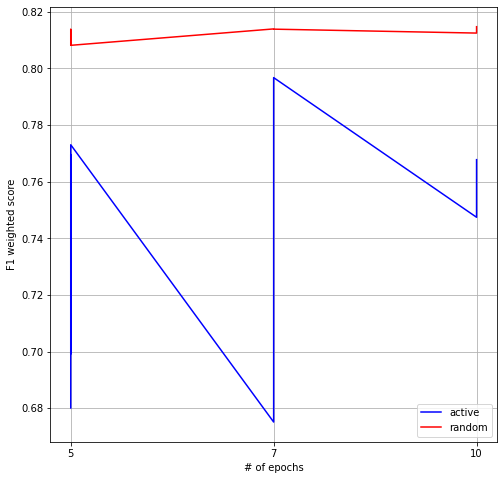

In [8]:
plt.figure(figsize=(8, 8))
plt.grid()
plt.plot(active['num_epochs'], active['f1 weighted'], label='active', color='b')
plt.plot(random['num_epochs'], random['f1 weighted'], label='random', color='r')
plt.xlabel('# of epochs')
plt.ylabel('F1 weighted score')
plt.legend()

In [23]:
def print_train_history(model_name):
    df = read_json_to_df(f'output/{model_name}.json')

    for percent in df['percent'].unique():
        active = df[(df['learner'] == 'active') & (df['percent']==percent)]
        random = df[(df['learner'] == 'random') & (df['percent']==percent)]
        if len(active)>1:
            plt.figure(figsize=(8, 8))
            plt.title(f'Compare test f1 weighted score for active \nlearner and random for {model_name} and {percent}% \nof used train data at each epoch')
            plt.grid()
            plt.plot(active['num_epochs'], active['f1 weighted'], label='active', color='b')
            plt.plot(random['num_epochs'], random['f1 weighted'], label='random', color='r')
            plt.xlabel('# of epochs')
            plt.ylabel('F1 weighted score')
            plt.legend()
            plt.show()

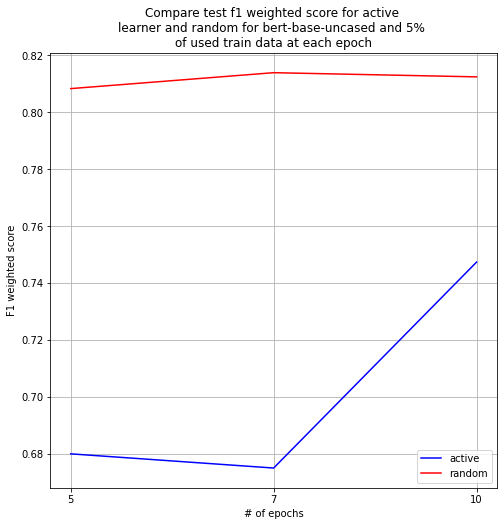

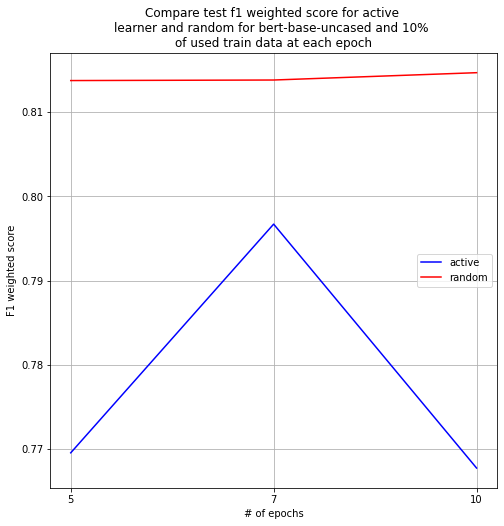

In [24]:
print_train_history('bert-base-uncased')

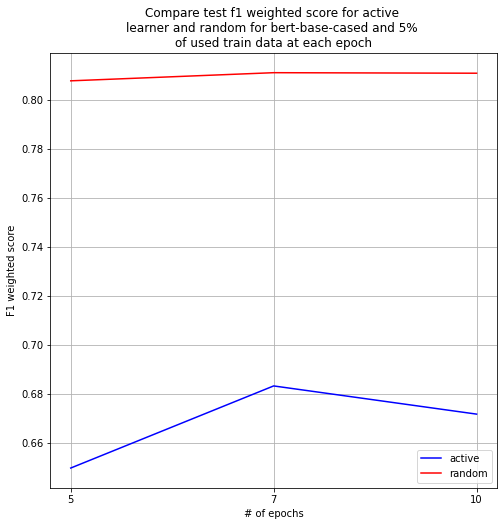

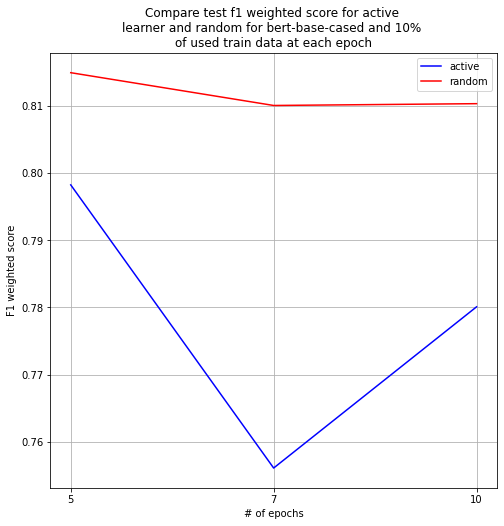

In [25]:
print_train_history('bert-base-cased')

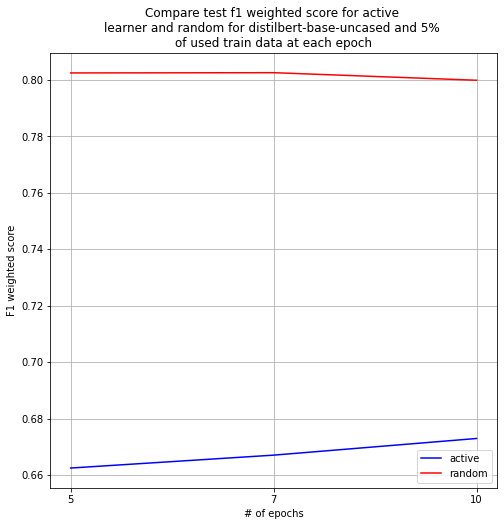

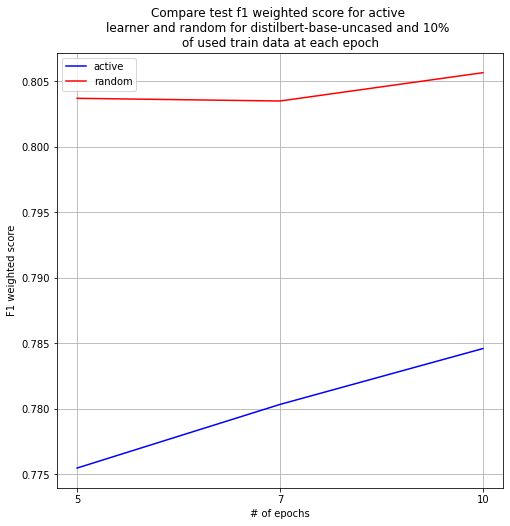

In [26]:
print_train_history('distilbert-base-uncased')

In [27]:
bert_uncased=read_json_to_df('output/bert-base-uncased.json')
bert_cased=read_json_to_df('output/bert-base-cased.json')
dist=read_json_to_df('output/distilbert-base-uncased.json')

In [28]:
bert_cased['model']='bert-base-cased'
bert_uncased['model']='bert-base-uncased'
dist['model']='distilbert-base-uncased'

In [15]:
whole=pd.concat([bert_cased, bert_uncased, dist])

In [16]:
active=whole[whole['learner']=='active']
random=whole[whole['learner']=='random']

In [17]:
whole.head(3)

,learner,num_epochs,percent,f1 weighted,f1 macro,f1 micro,accuracy,model
0,active,5,5,0.649843,0.603284,0.623902,0.623902,bert-base-cased
1,random,5,5,0.807733,0.725738,0.813824,0.813824,bert-base-cased
2,active,5,10,0.798243,0.726871,0.798062,0.798062,bert-base-cased


In [18]:
whole_merged=pd.merge(active, random, on=['num_epochs', 'percent', 'model'], suffixes=[' active', ' random'])

In [19]:
whole_merged.head(3)

,learner active,num_epochs,percent,f1 weighted active,f1 macro active,f1 micro active,accuracy active,model,learner random,f1 weighted random,f1 macro random,f1 micro random,accuracy random
0,active,5,5,0.649843,0.603284,0.623902,0.623902,bert-base-cased,random,0.807733,0.725738,0.813824,0.813824
1,active,5,10,0.798243,0.726871,0.798062,0.798062,bert-base-cased,random,0.814954,0.739202,0.819897,0.819897
2,active,5,15,0.716154,0.667824,0.702326,0.702326,bert-base-cased,random,0.806315,0.728799,0.808269,0.808269


In [20]:
whole_merged[['model','percent', 'num_epochs', 'f1 weighted active', 'f1 weighted random', 'accuracy active', 'accuracy random']].sort_values(by=['model', 'percent', 'num_epochs']).to_markdown(index=False)

'| model                   |   percent |   num_epochs |   f1 weighted active |   f1 weighted random |   accuracy active |   accuracy random |\n|:------------------------|----------:|-------------:|---------------------:|---------------------:|------------------:|------------------:|\n| bert-base-cased         |        10 |           10 |             0.780081 |             0.81034  |          0.797545 |          0.818863 |\n| bert-base-cased         |        10 |            5 |             0.798243 |             0.814954 |          0.798062 |          0.819897 |\n| bert-base-cased         |        10 |            7 |             0.75607  |             0.81007  |          0.795995 |          0.816279 |\n| bert-base-cased         |        15 |            5 |             0.716154 |             0.806315 |          0.702326 |          0.808269 |\n| bert-base-cased         |        20 |            5 |             0.760637 |             0.797253 |          0.747933 |          0.814083 |\n| ber

In [62]:
!pip install tabulate

  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
